In [15]:
!pip install pytorch-tabnet

In [16]:
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, matthews_corrcoef
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder

In [17]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
import torch

import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, matthews_corrcoef
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier


In [18]:
features = ['prot_2_882',
'prot_2_847',
'prot_2_957',
'prot_2_1005',
'prot_2_172',
'prot_2_434',
'prot_2_592',
'prot_1_173',
'prot_2_59',
'prot_1_340',
'prot_1_352',
'prot_2_1013',
'prot_2_583',
'prot_1_56',
'prot_2_483',
'prot_2_861',
'wind_882',
'prot_1_829',
'wind_792',
'prot_1_561',
'prot_1_291',
'prot_1_815',
'prot_2_951',
'prot_2_114',
'prot_2_901',
'prot_2_107',
'wind_596',
'wind_532',
'prot_2_44',
'prot_1_374',
'prot_2_372',
'prot_2_471',
'prot_2_319',
'wind_564',
'prot_2_996',
'wind_961',
'wind_613',
'prot_2_573',
'wind_978',
'prot_2_193',
'prot_1_651',
'prot_1_547',
'prot_1_501',
'prot_2_803',
'wind_495',
'wind_55',
'wind_659',
'prot_1_466',
'prot_2_6',
'wind_420',
'wind_836',
'wind_865',
'wind_703',
'wind_850',
'wind_922',
'prot_1_453',
'wind_878',
'prot_2_876',
'prot_1_887',
'wind_580',
'wind_793',
'prot_1_253',
'prot_2_249',
'prot_2_739',
'prot_1_338',
'wind_393',
'wind_550',
'wind_778',
'wind_220',
'prot_1_895',
'prot_2_810',
'prot_1_559',
'Is_int',
'PTM',
'Effect']

print(len(features))

75


In [26]:
data = pd.read_csv('/content/Hum_final.csv')

data.drop(columns = ['Unnamed: 0'], inplace = True)
#for one-hot encoding
"""data = pd.get_dummies(data, columns=["PTM"], prefix=["Type_is"])
print(enc_df.head)
data =  pd.get_dummies(data, columns=["AA"], prefix=["Type_is"])"""
#data = data[features] #features chosen by RFE
print(data.columns)
print(data.head())
h = data.drop(columns = ['Effect']).to_numpy()
#data.drop(columns = ['PTM, AA'], inplace = True)
scaler = StandardScaler()
scaler.fit(h)
test_data = data.sample(frac = 0.1, random_state = 42)
ind = test_data.index
data.drop(ind, axis = 0, inplace=True)


Index(['prot_2_882', 'prot_2_847', 'prot_2_957', 'prot_2_1005', 'prot_2_172',
       'prot_2_434', 'prot_2_592', 'prot_1_173', 'prot_2_59', 'prot_1_340',
       'prot_1_352', 'prot_2_1013', 'prot_2_583', 'prot_1_56', 'prot_2_483',
       'prot_2_861', 'wind_882', 'prot_1_829', 'wind_792', 'prot_1_561',
       'prot_1_291', 'prot_1_815', 'prot_2_951', 'prot_2_114', 'prot_2_901',
       'prot_2_107', 'wind_596', 'wind_532', 'prot_2_44', 'prot_1_374',
       'prot_2_372', 'prot_2_471', 'prot_2_319', 'wind_564', 'prot_2_996',
       'wind_961', 'wind_613', 'prot_2_573', 'wind_978', 'prot_2_193',
       'prot_1_651', 'prot_1_547', 'prot_1_501', 'prot_2_803', 'wind_495',
       'wind_55', 'wind_659', 'prot_1_466', 'prot_2_6', 'wind_420', 'wind_836',
       'wind_865', 'wind_703', 'wind_850', 'wind_922', 'prot_1_453',
       'wind_878', 'prot_2_876', 'prot_1_887', 'wind_580', 'wind_793',
       'prot_1_253', 'prot_2_249', 'prot_2_739', 'prot_1_338', 'wind_393',
       'wind_550', 'wind_778', 

In [27]:

data.drop_duplicates(inplace = True, keep = False) #just in case...

#print(data['AA'].dtypes)

print(test_data.shape)
print(data.shape)

data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_data = test_data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_train= data.drop(['Effect'], axis=1)
y_train= data['Effect']

X_test = test_data.drop(['Effect'], axis=1)
y_test = test_data['Effect']

#scale data for Tabnet
X_train_tab = scaler.transform(X_train.to_numpy())
y_train_tab = y_train.to_numpy()
X_test_tab = scaler.transform(X_test.to_numpy())
y_test_tab = y_test.to_numpy()


(3084, 75)
(343, 75)
(3084, 75)
<bound method NDFrame.head of       prot_2_882  prot_2_847  prot_2_957  prot_2_1005  prot_2_172  prot_2_434  \
578    -0.068456   -0.023292    0.058310    -0.008347    0.055928   -0.007887   
1861   -0.056403   -0.006302    0.039261    -0.035497    0.036302   -0.032845   
564    -0.034927   -0.025544    0.063478    -0.006928    0.014997   -0.053517   
2648   -0.049987    0.010334    0.052014    -0.012648    0.044547   -0.031027   
2720   -0.022484   -0.017166    0.040727     0.033625    0.004863    0.022200   
...          ...         ...         ...          ...         ...         ...   
157    -0.014439   -0.016077    0.087140    -0.007342    0.056588   -0.042428   
2750   -0.035705    0.049195   -0.020888     0.015398    0.035821   -0.003597   
3023   -0.023554   -0.053042    0.068917    -0.050485    0.021947    0.035297   
1360   -0.036015    0.004036    0.011512     0.017435    0.058056    0.002700   
254    -0.015726   -0.004434    0.023569    -0.

In [ ]:
betts_set = pd.read_csv('/content/Bett_FINAL_prot_el.csv')
betts_set.drop(columns = ['Unnamed: 0', 'Site'], inplace = True)
betts_set = betts_set[features]
betts_set = betts_set.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
#since Bett's only has phosphorylation, have to do one-hot encoding manually
#betts_set['Type_is_Ac'] = [0]*len(betts_set)
#betts_set['Type_is_Glyco'] = [0]*len(betts_set)
#betts_set['Type_is_Me'] =  [0]*len(betts_set)
#betts_set['Type_is_Phos'] =  [1]*len(betts_set)
#betts_set['Type_is_Sumo'] =  [0]*len(betts_set)
#betts_set['Type_is_Ub'] =  [0]*len(betts_set)

#betts_set =  pd.get_dummies(betts_set, columns=["AA"], prefix=["Type_is"])
bett_x = betts_set.drop(columns = ['Effect'])
print(bett_x.columns)
print(bett_x.head)

bett_y = betts_set['Effect']
(print(bett_y.value_counts()))
bx_tab = scaler.transform(bett_x.to_numpy())
by_tab = bett_y.to_numpy()

Index(['Unnamed: 0', 'PTM', 'Site', 'Effect', 'Is_int', 'prot_1_0', 'prot_1_1',
       'prot_1_2', 'prot_1_3', 'prot_1_4',
       ...
       'wind_1014', 'wind_1015', 'wind_1016', 'wind_1017', 'wind_1018',
       'wind_1019', 'wind_1020', 'wind_1021', 'wind_1022', 'wind_1023'],
      dtype='object', length=3077)
Index(['prot_2_882', 'prot_2_847', 'prot_2_957', 'prot_2_1005', 'prot_2_172',
       'prot_2_434', 'prot_2_592', 'prot_1_173', 'prot_2_59', 'prot_1_340',
       'prot_1_352', 'prot_2_1013', 'prot_2_583', 'prot_1_56', 'prot_2_483',
       'prot_2_861', 'wind_882', 'prot_1_829', 'wind_792', 'prot_1_561',
       'prot_1_291', 'prot_1_815', 'prot_2_951', 'prot_2_114', 'prot_2_901',
       'prot_2_107', 'wind_596', 'wind_532', 'prot_2_44', 'prot_1_374',
       'prot_2_372', 'prot_2_471', 'prot_2_319', 'wind_564', 'prot_2_996',
       'wind_961', 'wind_613', 'prot_2_573', 'wind_978', 'prot_2_193',
       'prot_1_651', 'prot_1_547', 'prot_1_501', 'prot_2_803', 'wind_495',
       'wind

## **tabnet**

In [ ]:
#no parameter optimization unless model performs best, hence code is in """"

"""
param_grid = {
    'n_d': [8, 16, 32, 64],                # Dimension of the prediction layer
    'n_a': [8, 16, 32, 64],                # Dimension of the attention layer. Often set to the same value as n_d.
    'n_steps': [3, 5, 7],                  # Number of decision steps
    'gamma': [1.0, 1.2, 1.5, 2.0],         # Coefficient for feature reusage in the decision steps
    'lambda_sparse': [0.001, 0.01, 0.1],   # Regularization coefficient for the sparse max operation. Encourages the model to use fewer features.
    'optimizer_fn': [torch.optim.Adam],    # Optimizer. Adam is commonly used.
    'momentum': [0.02, 0.3, 0.6, 0.9],     # Momentum for the optimizer if applicable
    'mask_type': ['sparsemax', 'entmax'],  # Type of masking. Sparsemax is generally more stable.
    'scheduler_params': [{'step_size': s, 'gamma': g} for s in [10, 50] for g in [0.9, 0.95]],  # Example scheduler parameters for StepLR
    'scheduler_fn': [torch.optim.lr_scheduler.StepLR]  # Learning rate scheduler. StepLR is one option.
}



# Find the best hyperparameters by cross-validation
best_auc = 0
best_params = None

for params in ParameterGrid(param_grid):
    tabnet_model = TabNetClassifier(
        verbose=1,
        **params
    )
    tabnet_model.fit(
        X_train_tab, y_train_tab,
        eval_set=[(X_train_tab, y_train_tab), (X_val_tab, y_val_tab)],
        eval_name=['train', 'valid'],
        eval_metric=['accuracy'],
        max_epochs=50,
        patience=5,
        batch_size=256
    )
    val_auc = tabnet_model.best_cost
    if val_auc > best_auc:
        best_auc = val_auc
        best_params = params

print(f"Best AUC on validation set: {best_auc}")
print(f"Best hyperparameters: {best_params}")
"""



# Train the final model with the best hyperparameters
final_tabnet_model = TabNetClassifier(
    verbose=1
)
final_tabnet_model.fit(
    X_train_tab, y_train_tab,
    max_epochs=500
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.09896 |  0:00:00s
epoch 1  | loss: 0.9247  |  0:00:00s
epoch 2  | loss: 0.83714 |  0:00:00s
epoch 3  | loss: 0.77724 |  0:00:00s
epoch 4  | loss: 0.71602 |  0:00:00s
epoch 5  | loss: 0.69659 |  0:00:00s
epoch 6  | loss: 0.66013 |  0:00:00s
epoch 7  | loss: 0.63649 |  0:00:00s
epoch 8  | loss: 0.63914 |  0:00:00s
epoch 9  | loss: 0.63693 |  0:00:00s
epoch 10 | loss: 0.59458 |  0:00:01s


KeyboardInterrupt: ignored

In [1]:
y_proba = final_tabnet_model.predict_proba(X_val_tab)
# Predict on the test set
y_pred_tab = final_tabnet_model.predict(X_val_tab)
print(classification_report(y_val_tab, y_pred_tab))
print(confusion_matrix(y_val_tab, y_pred_tab))
print(roc_auc_score(y_val_tab, y_proba, multi_class='ovo', average  = 'weighted'))
#for multiclass
#print(roc_auc_score(y_val_tab, y_proba, multi_class='ovo', average  = 'weighted'))
#for binary
#print(roc_auc_score(y_val_tab, y_proba[:,1]))
print(matthews_corrcoef(y_val_tab, y_pred_tab))


NameError: ignored

# **XGBOOST**

In [ ]:
#again with hyperparameters
"""xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier',XGBClassifier())])
param_grid = {
    'classifier__learning_rate': np.array([0.01, 0.03, 0.1]),
    'classifier__n_estimators': np.array([200, 300, 400, 500]),
    'classifier__subsample': np.array([0.6, 0.7, 0.8, 0.9, 1.0]),
    'classifier__max_depth': np.array([6, 8, 10, 12, 14, 16]),
    'classifier__lambda': np.array([0.5, 1, 1.5]),
    'classifier__gamma': np.array([0, 0.1, 0.2]),
    'classifier__colsample_bytree': np.array([0.6, 0.7, 0.8, 0.9, 1.0]),
    'classifier__min_child_weight': np.array([1, 3, 5])
}


grid_search = RandomizedSearchCV(estimator=xgb_pipeline, param_distributions=param_grid, n_jobs= -1,
                         scoring='accuracy', verbose=10, n_iter = 150)

grid_res = grid_search.fit(X_train,y_train)

# Convert categorical variable(s) into dummy/indicator variables

print(grid_res.best_params_)"""


In [ ]:
"""
model = grid_res.best_estimator_
XGBClassifier(learning_rate=grid_search.best_params_['classifier__learning_rate'],
                                    subsample=grid_search.best_params_['classifier__subsample'],
                                    max_depth=grid_search.best_params_['classifier__max_depth'],
                                    n_estimators=grid_search.best_params_['classifier__n_estimators'],
                                    gamma = grid_search.best_params_['classifier__gamma'])

"""
model = XGBClassifier()

model.fit(X_train, y_train)
y_pred= model.predict(X_val)
y_prob = model.predict_proba(X_val)

In [2]:
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
#for multiclass
print(roc_auc_score(y_val, y_prob, multi_class='ovo', average  = 'weighted'))
#for binary
print(roc_auc_score(y_val, y_prob[:,1]))
print(matthews_corrcoef(y_val, y_pred))


NameError: ignored

In [ ]:
y_pred= model.predict(bett_x)
y_prob = model.predict_proba(bett_x)

LGBM
# **Новый раздел**

In [22]:
import lightgbm as lgb

In [ ]:



# Define the parameter grid
param_grid= {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [-1, 10, 15, 20, 25],  # -1 means no limit
    'num_leaves': [15, 31, 63, 127],  # 2^(max_depth) <= num_leaves
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'min_child_samples': [10, 20, 30, 40],  # Minimum number of data needed in a child (leaf)
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # fraction of samples used for fitting the trees
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # fraction of features used for fitting the trees
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1]  # L2 regularization
}


# Initialize a LGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize the GridSearch object
grid_lgbm = RandomizedSearchCV(lgbm, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_iter = 150)


# Fit the model to the data
grid_res = grid_lgbm.fit(X_train, y_train)
print(grid_lgbm.best_params_)


Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [28]:

y_pred = grid_res.predict(X_test)
y_prob = grid_res.predict_proba(X_test)

[LightGBM] [Warning] Unknown parameter: colsample_bytrees
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: colsample_bytrees
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Info] Number of positive: 935, number of negative: 2149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18344
[LightGBM] [Info] Number of data points in the train set: 3084, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303178 -> initscore=-0.832211
[LightGBM] [Info] Start training from score -0.832211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [29]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_prob[:,1]))
#, multi_class='ovo', average  = 'weighted'))
print(matthews_corrcoef(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.89       245
           1       0.80      0.60      0.69        98

    accuracy                           0.84       343
   macro avg       0.83      0.77      0.79       343
weighted avg       0.84      0.84      0.84       343

[[230  15]
 [ 39  59]]
0.8886297376093294
0.5939554532776409


<Figure size 2000x1000 with 0 Axes>

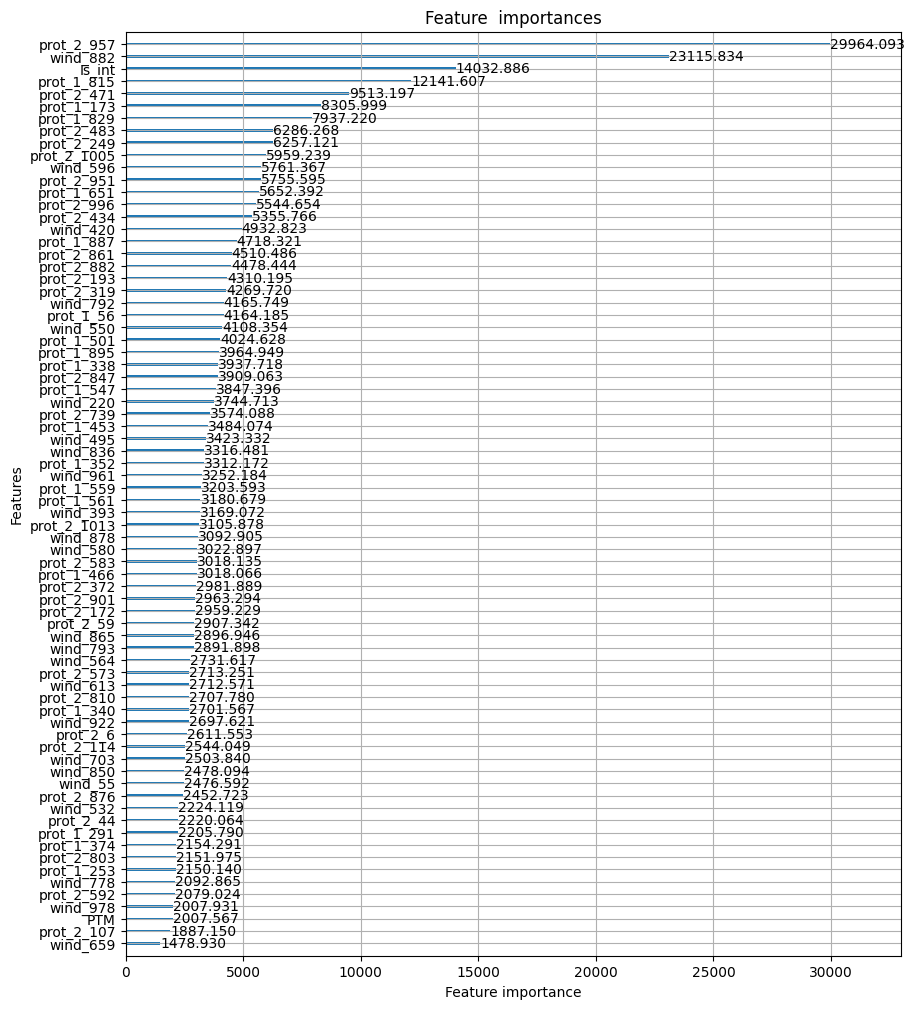

In [ ]:
plt.figure(figsize=(20, 10))
lgb.plot_importance(model, figsize=(10, 12), importance_type = 'gain')
#change to 'split' for split importances
plt.title("Feature  importances")
plt.show()

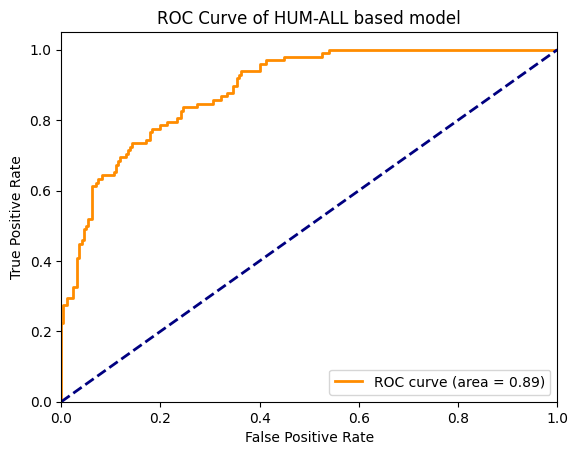

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# for BINARY
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of HUM-ALL based model')
plt.legend(loc="lower right")
plt.show()

{0: array([0.        , 0.        , 0.        , 0.00990099, 0.00990099,
       0.01980198, 0.01980198, 0.02970297, 0.02970297, 0.03960396,
       0.03960396, 0.06930693, 0.06930693, 0.08910891, 0.08910891,
       0.0990099 , 0.0990099 , 0.10891089, 0.10891089, 0.11881188,
       0.11881188, 0.12871287, 0.12871287, 0.13861386, 0.13861386,
       0.14851485, 0.14851485, 0.15841584, 0.15841584, 0.16831683,
       0.16831683, 0.18811881, 0.18811881, 0.23762376, 0.23762376,
       0.26732673, 0.26732673, 0.27722772, 0.27722772, 0.2970297 ,
       0.2970297 , 0.31683168, 0.31683168, 0.32673267, 0.32673267,
       0.33663366, 0.33663366, 0.34653465, 0.34653465, 0.35643564,
       0.35643564, 0.36633663, 0.36633663, 0.37623762, 0.37623762,
       0.40594059, 0.40594059, 0.45544554, 0.45544554, 0.46534653,
       0.46534653, 0.47524752, 0.47524752, 0.53465347, 0.53465347,
       0.55445545, 0.55445545, 0.62376238, 0.62376238, 0.63366337,
       0.63366337, 0.66336634, 0.66336634, 0.69306931, 0.6

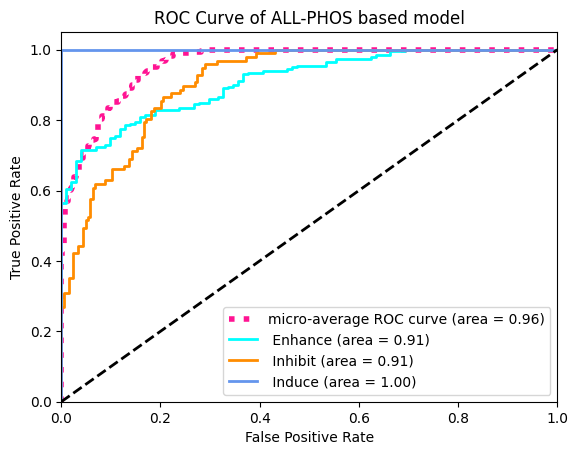

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

#FOR MULTICLASS
n_classes = 3  # Replace with the number of classes

y_test_binarized = label_binarize(y_test, classes=[*range(n_classes)])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], [x[i] for x in y_prob])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), np.array(y_prob).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()
print(fpr)
classes = ['Enhance', 'Inhibit', 'Induce']

plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(classes, colors):
    plt.plot(fpr[classes.index(i)], tpr[classes.index(i)], color=color, lw=2,
             label=' {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[classes.index(i)]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of ALL-PHOS based model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_pred= model.predict(bett_x)
y_prob = model.predict_proba(bett_x)

[LightGBM] [Warning] Unknown parameter: colsample_bytrees
[LightGBM] [Warning] Unknown parameter: min_child_sample
[LightGBM] [Warning] Unknown parameter: colsample_bytrees
[LightGBM] [Warning] Unknown parameter: min_child_sample
[[0.79239358 0.20760642]
 [0.79318427 0.20681573]
 [0.10265893 0.89734107]
 [0.46411548 0.53588452]
 [0.52648274 0.47351726]
 [0.20105439 0.79894561]
 [0.81418834 0.18581166]
 [0.82807814 0.17192186]
 [0.71173138 0.28826862]
 [0.93400037 0.06599963]
 [0.24884148 0.75115852]
 [0.77924226 0.22075774]
 [0.95443304 0.04556696]
 [0.42047993 0.57952007]
 [0.35741866 0.64258134]
 [0.39685706 0.60314294]
 [0.95965605 0.04034395]
 [0.95423737 0.04576263]
 [0.9460805  0.0539195 ]
 [0.95867313 0.04132687]
 [0.45701839 0.54298161]
 [0.94088852 0.05911148]
 [0.94008994 0.05991006]
 [0.94088852 0.05911148]
 [0.92900785 0.07099215]
 [0.94088852 0.05911148]
 [0.92996076 0.07003924]
 [0.94088852 0.05911148]
 [0.74076506 0.25923494]
 [0.61368051 0.38631949]
 [0.58360747 0.41639

In [ ]:
print(classification_report(bett_y, y_pred))
print(confusion_matrix(bett_y, y_pred))
print(roc_auc_score(bett_y, y_prob[:,1]))
print(matthews_corrcoef(bett_y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       238
           1       0.66      0.60      0.63        97

    accuracy                           0.79       335
   macro avg       0.75      0.74      0.74       335
weighted avg       0.79      0.79      0.79       335

[[208  30]
 [ 39  58]]
0.814909468942216
0.486321211835458


Random Forests

In [ ]:
"""rf = RandomForestClassifier()


param_grid= {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],  # None means nodes are expanded until all leaves are pure or contain less than min_samples_split samples
    'min_samples_split': [2, 5, 10, 20],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],     # The minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],           # Whether bootstrap samples are used when building trees
    'max_features': ['auto', 'sqrt', 'log2', None],  # The number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy'],     # Function to measure the quality of a split
    'oob_score': [True, False]            # Whether to use out-of-bag samples to estimate the generalization accuracy
}


# Build the grid search
dfrst = RandomForestClassifier()
grid = RandomizedSearchCV(estimator=dfrst, param_distributions=param_grid, cv = 5, scoring = 'accuracy', n_iter = 150)
grid_results = grid.fit(X_train, y_train)
print(grid_results.best_params_)

best_clf = grid_results.best_estimator_

y_pred = best_clf.predict(X_val)
y_prob = best_clf.predict_proba(X_val)"""




In [ ]:
best_clf = RandomForestClassifier()
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_val)
y_prob = best_clf.predict_proba(X_val)

In [ ]:
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(roc_auc_score(y_val, y_prob, multi_class='ovo', average  = 'weighted'))
print(matthews_corrcoef(y_val, y_pred))